# Screening Assignment

**Question 1.   
Create a function in python to read the text file and replace specific content of the file.**
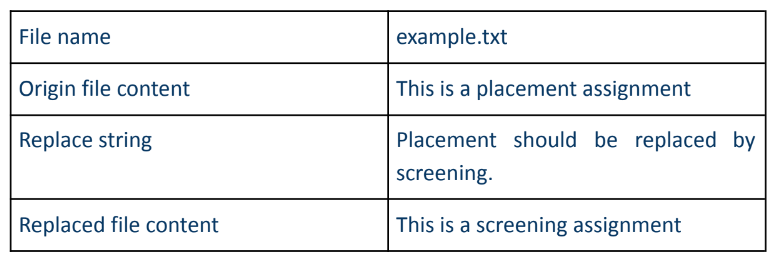

In [33]:
import re
def content_replacement(file, content_to_replace, replacement):
    """
    This function will replace the word/sentence passed with new word/sentence. \n 
    It will update the text file with new word.
    
    If file type is other than .txt file then, it will raise NameError.
    
    If word/sentence is not present in the file then, it will raise ValueError.
    
    *Params*:
    ----------------------
    file (datatype : str) : It is a text file(.txt file) on which supposed to be performed.
    
    content_to_replace (datatype : str) : Word/sentence to be replaced in the file.
    
    replacement (datatype : str) : Word/sentence which will replace the mentioned word.
           
    *Returns*:
    ----------------------
    It will not return anything. It will just update the file passed.
    
    """
    try:
        if file.endswith(".txt") == False:   # Checking whether it is .txt file or not
            raise NameError("Wrong File type!!! Please pass only .txt file")
            
        with open(file, "r+", encoding = "utf-8") as f:    # opening given file
            file_content = f.read()                        # Reading contents of the files
            
            # Checking whether word which to be replaced present the file or not
            if re.findall(content_to_replace,file_content)== list():   
                raise ValueError("Word to be replace is not present in the file")
                
            # Replacing the word with the new word using RegEx function
            replaced_content = re.sub(content_to_replace,replacement,file_content)
            f.seek(0)                   # Setting the cursor point at the start point in the txt file
            f.write(replaced_content)   # Writing the replaced content in the file
        print(f"Replaced '{content_to_replace}' with '{replacement}'")
            
    except NameError as f:
        print("Error Occured: ",f)
    except ValueError as v:
        print("Error Occured: ",v)
    except Exception as e:
        print("Error Occured: ",e)
        

In [32]:
file = r"C:\Users\dell\Desktop\example.txt"
content_replacement(file,"placement","screening")

Replaced 'placement' with 'screening'


**Question 2.   
Demonstrate use of abstract class, multiple inheritance and decorator in python using examples.**

####    ------------ Multiple Inheritance ------------
Multiple Inheritance is a type of inheritance where child class derive properties from more than 1 parent class.
For ex: Class 3 inherits properties from both Class 1 and Class 2 both.Suppose, a HOD will be a part of School Staff class and Teachers Class.


In [38]:
class School_Staff:
    def __init__(self, empid, name):
        self.empid = empid
        self.name = name
        
class Teachers:
    def __init__(self, subject, pay):
        self.subject = subject
        self.pay = pay
        
class HOD(School_Staff, Teachers):
    def __init__(self,empid, name, subject, pay, department):
        self.department = department
        School_Staff.__init__(self, empid, name)
        Teachers.__init__(self, subject, pay)
        
        print("EmpID : {}, Name : {}, Subject : {}, Salary : {}, HOD : {}"\
              .format(self.empid, self.name, self.subject, self.pay, self.department))
        
hod = HOD(123, "Shivansh", "Economics", 50000, "Humanities")
        

EmpID : 123, Name : Shivansh, Subject : Economics, Salary : 50000, HOD : Humanities


#### ---------------- Decorator ----------------

A decorator is a function which takes another function as a argument and returns a function. Decorator is very usefull in terms of extending the functionality of function passed as argument without modifying it. For exampple, @staticmethod, @classmethod

Suppose, we need to find the square root of product of tuples and return a list of square roots.

In [40]:
import math
def sqrt_decorator(n):
    def outer(function):
        def inner(list_tuples):
            sqrt = [math.pow(function(i[0],i[1]),n) for i in list_tuples]
            return sqrt
        return inner
    return outer

@sqrt_decorator(0.5)   ## Decorator
def multiply(a,b):
    return a*b

print(multiply([(4,5),(6,7), (8,9),(10,15)]))

[4.47213595499958, 6.48074069840786, 8.48528137423857, 12.24744871391589]


#### -------------- Abstract Class --------------

An abstract class is class which acts as a blueprint for other class i.e. it defines the properties and methods its child classes should contain. An class is an abstract class if it contains one or more abstract methods. The object of the abstract class can not be created directly.

In [61]:
from abc import ABC, abstractmethod
import math

class Shape(ABC):
    
    @abstractmethod
    def area():
        pass
    
    @abstractmethod
    def perimeter():
        pass
    
    @abstractmethod
    def __str__():
        pass
    
class Rectangle(Shape):
    def __init__(self,length, breadth):
        self.length = length
        self.breadth = breadth
    def area(self):
        return f"Area = {self.length*self.breadth}"
    
    def perimeter(self):
        return f"Perimeter = {2*(self.length+self.breadth)}"
    
    def __str__(self):
        return "Object of class Rectangle with length {} and breadth {}".format(self.length,self.breadth)
    
class Square(Shape):
    def __init__(self,side):
        self.side = side
    def area(self):
        return f"Area = {self.side**2}"
    def perimeter(self):
        return f"Perimeter = {4*(self.side)}"
    def __str__(self):
        return "Object of class Square with side {}".format(self.side)
    
class Circle(Shape):
    def __init__(self,radius):
        self.radius = radius
    def area(self):
        return f"Area = {math.pi*(self.radius**2)}"
    def perimeter(self):
        return f"Perimeter = {2*math.pi*self.radius}"
    def __str__(self):
        return "Object of class Clircle with radius {}".format(self.radius)

In [64]:
rec = Rectangle(4,5)
print(rec.area())
print(rec.perimeter())
print(rec)

Area = 20
Perimeter = 18
Object of class Rectangle with length 4 and breadth 5


In [65]:
sq = Square(16)
print(sq.area())
print(sq.perimeter())
print(sq)

Area = 256
Perimeter = 64
Object of class Square with side 16


In [66]:
circ = Circle(8)
print(circ.area())
print(circ.perimeter())
print(circ)

Area = 201.06192982974676
Perimeter = 50.26548245743669
Object of class Clircle with radius 8
